In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel("global-mining-dataset.xlsx", sheet_name="External")


# Rename columns to something cleaner
df = df.rename(columns={
    "Mine Name ": "Mine_Name",
    "Country or Region": "Country",
    "Primary Commodity": "Primary_Commodity",
    "Secondary Commodity": "Secondary_Commodity",
    "Other Commodities": "Other_Commodities",
    "Asset Type": "Asset_Type",
    "Confidence Factor": "Confidence_Factor"
})

# Standardize text (e.g., "gold " → "gold")
df["Primary_Commodity"] = df["Primary_Commodity"].str.strip().str.lower()
df["Country"] = df["Country"].str.strip()
df["Asset_Type"] = df["Asset_Type"].str.strip()

# Remove rows without coordinates (can’t be mapped)
df = df.dropna(subset=["Latitude", "Longitude"])

In [ ]:
#Save the cleaned dataset
df.to_csv("mining_cleaned.csv", index=False)


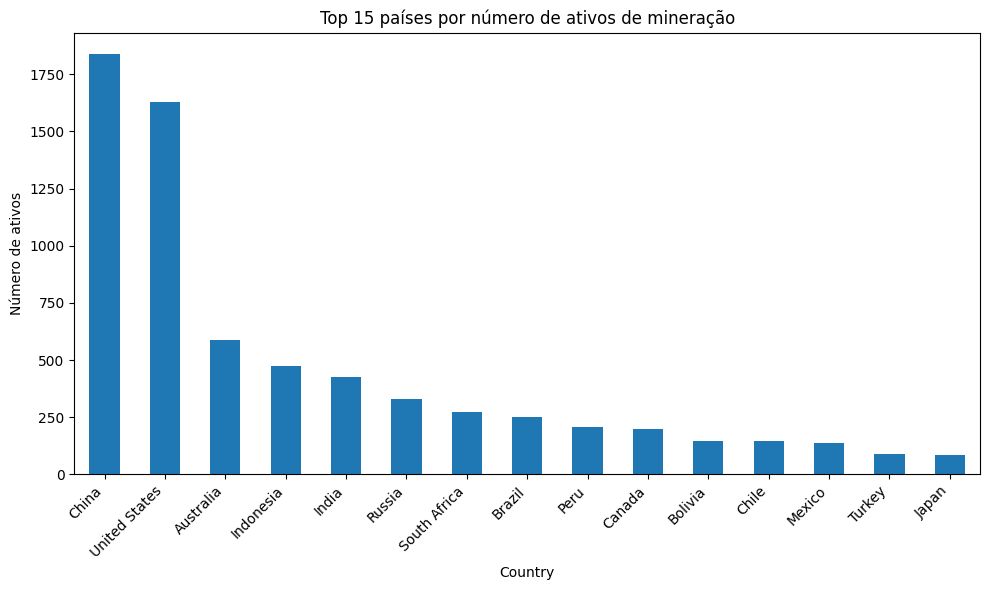

In [7]:
# Main Analyses
#Top countries by number of mining assets**

country_counts = df["Country"].value_counts().head(15)

plt.figure(figsize=(10,6))
country_counts.plot(kind="bar")
plt.title("Top 15 países por número de ativos de mineração")
plt.ylabel("Número de ativos")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


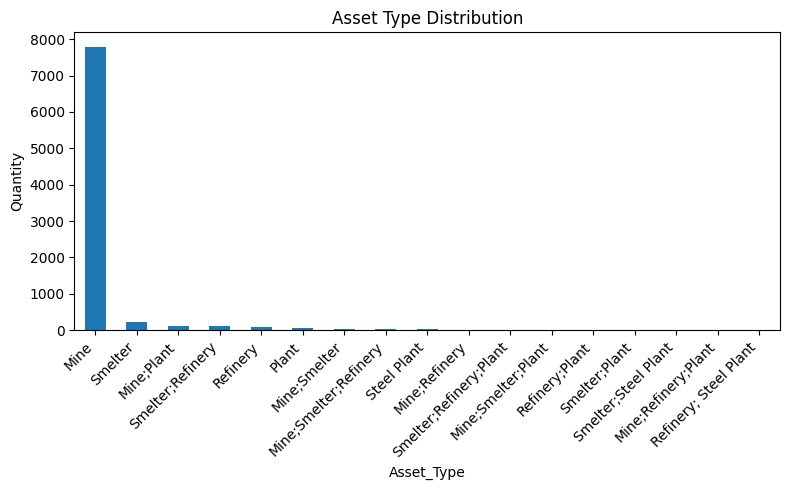

In [10]:
#Asset Type Distribution (Mine, Smelter, Refinery, etc.)

asset_counts = df["Asset_Type"].value_counts()

plt.figure(figsize=(8,5))
asset_counts.plot(kind="bar")
plt.title("Asset Type Distribution")
plt.ylabel("Quantity")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


The dataset includes combined asset types (e.g., Mine;Plant), representing multi-function facilities.
For analysis clarity, I standardized the field by extracting the primary asset type and also explored exploded counts to understand total processing capacity.

<Axes: xlabel='Asset_Type'>

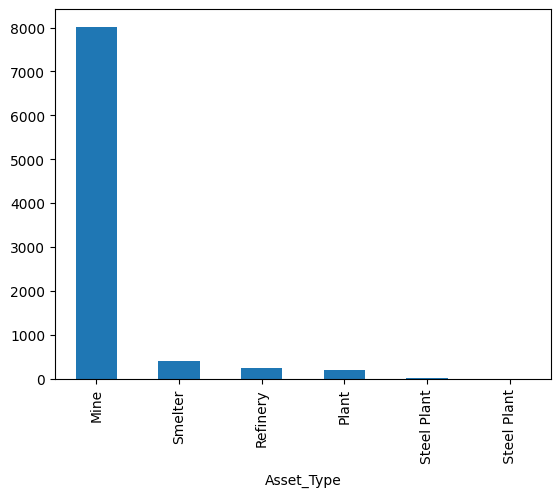

In [9]:
df_exploded = df.assign(
    Asset_Type=df["Asset_Type"].str.split(";")
).explode("Asset_Type")

df_exploded["Asset_Type"].value_counts().plot(kind="bar")


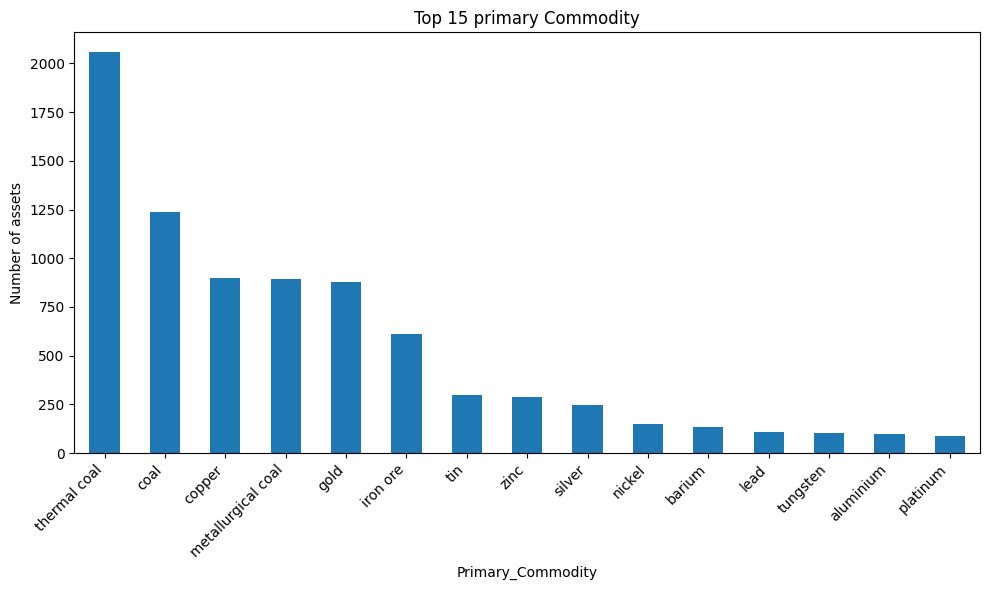

In [14]:
#Global ranking by Primary Commodity
commodity_counts = df["Primary_Commodity"].value_counts().head(15)

plt.figure(figsize=(10,6))
commodity_counts.plot(kind="bar")
plt.title("Top 15 primary Commodity")
plt.ylabel("Number of assets")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


This bar chart shows the Top 15 primary commodities based on the number of active mining assets worldwide. Each bar represents how many sites are primarily focused on extracting that specific commodity.
Overall, the chart highlights the dominance of coal-related commodities, the growing importance of energy-transition metals, and the continued relevance of traditional resources like gold and iron ore.

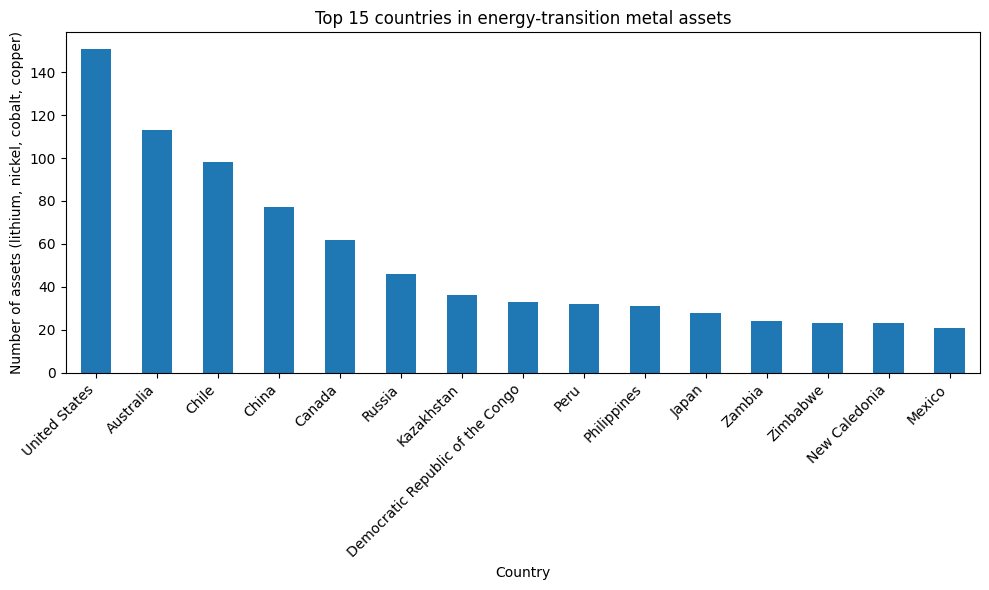

In [15]:
#Energy transition metals

energy_metals = ["lithium", "nickel", "cobalt", "copper"]
df["Is_Energy_Transition"] = df["Primary_Commodity"].isin(energy_metals)
df_energy = df[df["Is_Energy_Transition"]]

energy_by_country = (
    df_energy.groupby("Country")["ICMMID"]
    .count()
    .sort_values(ascending=False)
    .head(15)
)

plt.figure(figsize=(10,6))
energy_by_country.plot(kind="bar")
plt.title("Top 15 countries in energy-transition metal assets")
plt.ylabel("Number of assets (lithium, nickel, cobalt, copper)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

